# Titanic - Machine Learning from Disaster

<div style="text-align: justify"> 
Source: https://www.kaggle.com/code/preejababu/titanic-data-science-solutions
</div>

***

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pathlib

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# increase the display domain of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Load Data

In [3]:
path_code = pathlib.Path().resolve()
# list((path_code).iterdir())
path_data = path_code / 'Data'

In [4]:
##### load titanic train data #####
df_train_data = pd.read_csv(path_data / 'train.csv')

print(df_train_data.shape)
df_train_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
##### load titanic test data #####
df_test_data = pd.read_csv(path_data / 'test.csv')

print(df_test_data.shape)
df_test_data.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
combine = [df_train_data, df_test_data]

# Data Preprocessing

## Exploratory Data Analysis

In [7]:
df_train_data.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [8]:
df_test_data.isnull().sum().sort_values()

PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Fare             1
Age             86
Cabin          327
dtype: int64

In [9]:
df_train_data.info()
print('_'*50)
df_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [10]:
df_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train_data.describe(include=['O'])  # Selecting only variables that contain strings

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
df_train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
df_train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
df_train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
df_train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
df_train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
df_train_data.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

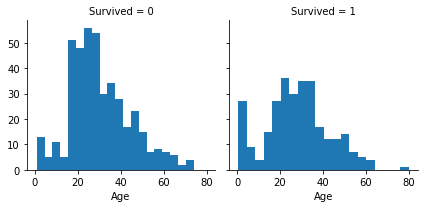

In [18]:
g = sns.FacetGrid(df_train_data.dropna(subset=['Age']), col='Survived')  
g.map(plt.hist, 'Age', bins=20)
# use dropna, otherwise you cannot run the code
# Source: https://stackoverflow.com/questions/42014687/histogram-plotting-attributeerror-max-must-be-larger-than-min-in-range-paramet

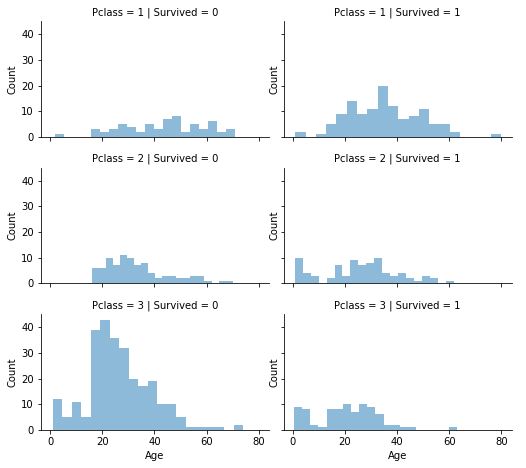

In [19]:
# grid = sns.FacetGrid(df_train_data, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df_train_data.dropna(subset=['Age']), col='Survived', row='Pclass', height=2.2, aspect=1.6)  # creates blank grid
grid.map(plt.hist, 'Age', alpha=.5, bins=20) # creates the histrogram and places them on the created grid
grid.add_legend();

plt.setp(grid.axes, ylabel='Count')
#plt.setp(grid.axes, xlabel='data', ylabel='frequency')
plt.show()
# Source: https://stackoverflow.com/questions/72196032/how-to-customize-histogram-using-seaborn-facetgrid
# The 'size' parameter is now renamed to 'height' in later versions

C:\Users\User\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\User\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


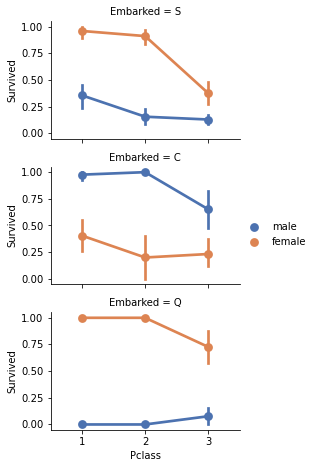

In [20]:
# grid = sns.FacetGrid(df_train_data, col='Embarked')
grid = sns.FacetGrid(df_train_data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\User\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


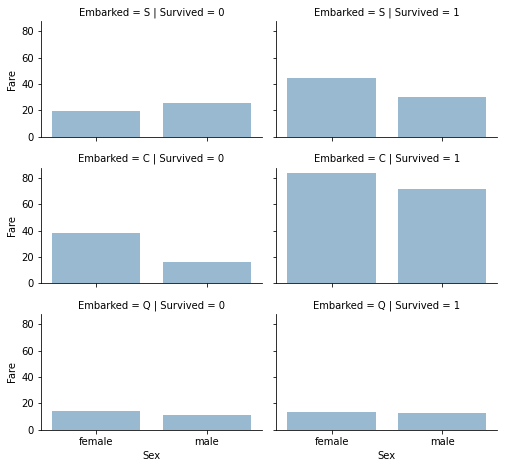

In [21]:
# grid = sns.FacetGrid(df_train_data, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df_train_data, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Data wrangling 

Main concerns for data preprocessing:
1. Deal with missing values for cabin, Age, Embarked:
   
   We can remove Cabin as it is a nominal variable.
   
   For Age we can use three strategies, which will be described in the relevant cells.
   
   For Embarked we have only 2 missing values, so we can replace missing values with the mode.
   

2. Use data standardization if applicable.


3. Use one-hot encoding if applicable.


4. Remove outliers if applicable.


In [22]:
# Dropping 'Ticket' and 'Cabin' columns
print("Before", df_train_data.shape, df_test_data.shape, combine[0].shape, combine[1].shape)

df_train_data = df_train_data.drop(['Ticket', 'Cabin'], axis=1)
df_test_data = df_test_data.drop(['Ticket', 'Cabin'], axis=1)
combine = [df_train_data, df_test_data]

"After", df_train_data.shape, df_test_data.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [23]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train_data['Title'], df_train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df_train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [25]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
df_train_data.groupby(['Title']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Title,,,,,,,,,,
1,517,517,517,517,517,398,517,517,517,517
2,185,185,185,185,185,149,185,185,185,184
3,126,126,126,126,126,109,126,126,126,125
4,40,40,40,40,40,36,40,40,40,40
5,23,23,23,23,23,22,23,23,23,23


In [27]:
df_train_data = df_train_data.drop(['Name', 'PassengerId'], axis=1)
df_test_data = df_test_data.drop(['Name'], axis=1)
combine = [df_train_data, df_test_data]
df_train_data.shape, df_test_data.shape

((891, 9), (418, 9))

In [28]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


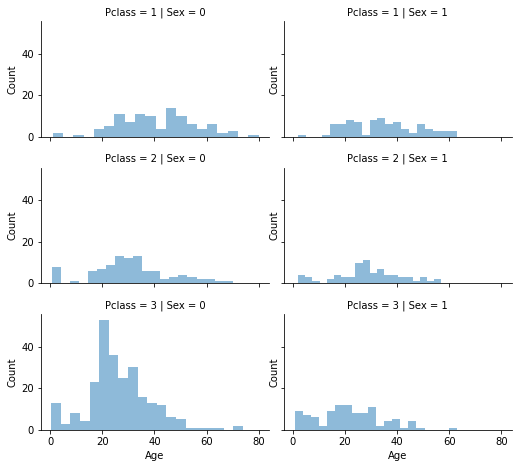

In [29]:
# grid = sns.FacetGrid(df_train_data, col='Pclass', hue='Gender')
grid = sns.FacetGrid(df_train_data.dropna(subset = ['Age']), row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.setp(grid.axes, ylabel='Count')
#plt.setp(grid.axes, xlabel='data', ylabel='frequency')
plt.show()
# Source: https://stackoverflow.com/questions/72196032/how-to-customize-histogram-using-seaborn-facetgrid

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

In [30]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [31]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),
                        'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [32]:
# Checking the age bands
df_train_data['AgeBand'] = pd.cut(df_train_data['Age'], 5)
df_train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [33]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [34]:
df_train_data = df_train_data.drop(['AgeBand'], axis=1)
combine = [df_train_data, df_test_data]
df_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [35]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df_train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

df_train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [37]:
df_train_data = df_train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df_test_data = df_test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [df_train_data, df_test_data]

df_train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [38]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

df_train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [39]:
freq_port = df_train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
df_train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [41]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df_train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


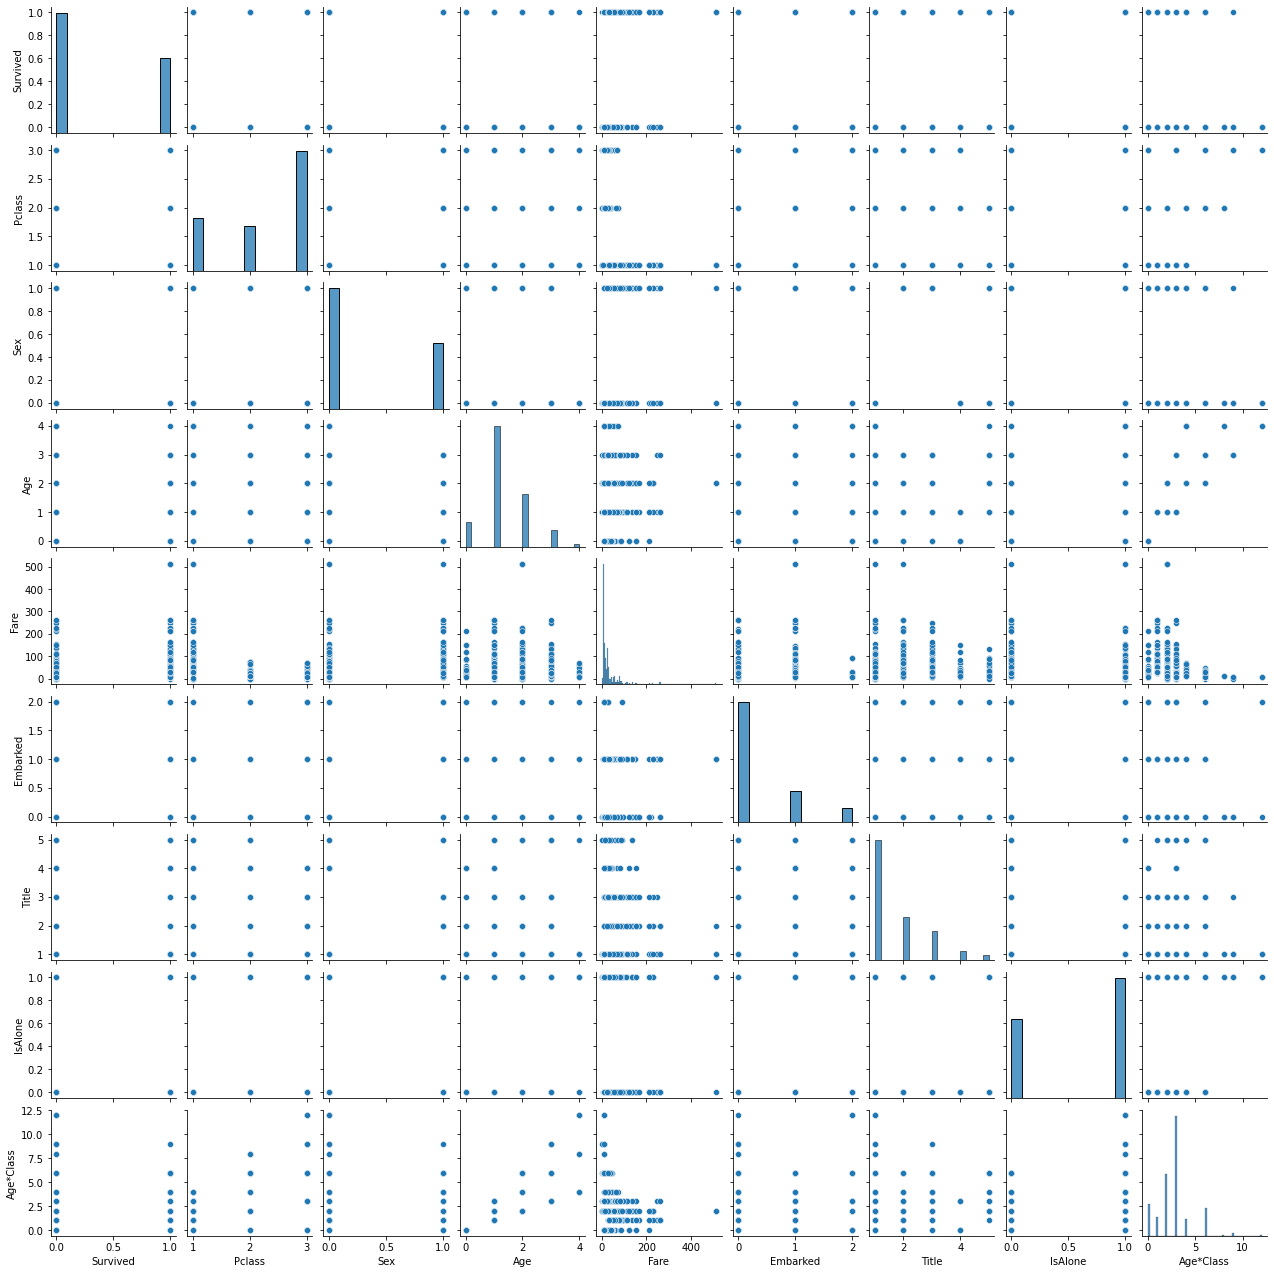

In [42]:
sns.pairplot(df_train_data,height=2)

Text(0, 0.5, 'Survived')

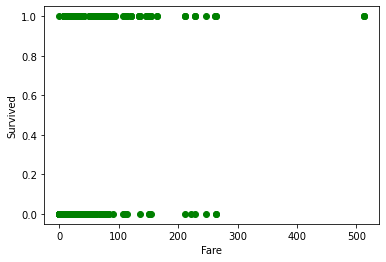

In [43]:
# Scatterplot of fare vs survived
plt.scatter(df_train_data['Fare'].to_numpy(),
           df_train_data['Survived'].to_numpy(),
           c = 'g')
plt.xlabel("Fare")
plt.ylabel("Survived")

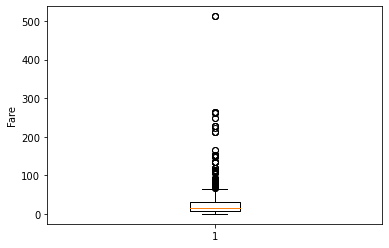

In [44]:
# Boxplot of fare
plt.boxplot(df_train_data['Fare'].to_numpy())
plt.ylabel("Fare")
plt.show()

In [45]:
# We see that there 3 observations having huge outliers in Fare, which can be removed
df_train_data[df_train_data['Fare']>=400]
# We'll remove the outliers at the end of preprocessing

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
258,1,1,1,2,512.3292,1,2,1,2
679,1,1,0,2,512.3292,1,1,0,2
737,1,1,0,2,512.3292,1,1,1,2


In [46]:
# Remove outliers from Fare:
df_train_data = df_train_data[df_train_data['Fare']<=400]
df_train_data.shape

(888, 9)

In [47]:
df_test_data['Fare'].fillna(df_test_data['Fare'].dropna().median(), inplace=True)
df_test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [48]:
df_train_data['Fare'].describe()

count    888.000000
mean      30.582164
std       41.176366
min        0.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      263.000000
Name: Fare, dtype: float64

In [49]:
df_train_data['FareBand'] = pd.qcut(df_train_data['Fare'], 4)
df_train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
# qcut is used to give quantile cuts. 4 gives us quartiles, 10 gives us deciles, etc.
# Discretize variable into equal-sized buckets based on rank or based on sample quantiles. 

C:\Users\User\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 30.772]",0.452055
3,"(30.772, 263.0]",0.576577


In [50]:
df_train_data.loc[ df_train_data['Fare'] <= 7.896, 'Fare'] = 0
df_train_data.loc[(df_train_data['Fare'] > 7.896) & (df_train_data['Fare'] <= 14.454), 'Fare'] = 1
df_train_data.loc[(df_train_data['Fare'] > 14.454) & (df_train_data['Fare'] <= 30.772), 'Fare']   = 2
df_train_data.loc[ df_train_data['Fare'] > 30.772, 'Fare'] = 3
df_train_data['Fare'] = df_train_data['Fare'].astype(int)
df_train_data

C:\Users\User\anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\User\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,0,1,0,0,1,0,3,"(-0.001, 7.896]"
1,1,1,1,2,3,1,3,0,2,"(30.772, 263.0]"
2,1,3,1,1,1,0,2,1,3,"(7.896, 14.454]"
3,1,1,1,2,3,0,3,0,2,"(30.772, 263.0]"
4,0,3,0,2,1,0,1,1,6,"(7.896, 14.454]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,1,2,"(7.896, 14.454]"
887,1,1,1,1,2,0,2,1,1,"(14.454, 30.772]"
888,0,3,1,1,2,0,2,0,3,"(14.454, 30.772]"
889,1,1,0,1,2,1,1,1,1,"(14.454, 30.772]"


In [51]:
df_test_data.loc[ df_test_data['Fare'] <= 7.896, 'Fare'] = 0
df_test_data.loc[(df_test_data['Fare'] > 7.896) & (df_test_data['Fare'] <= 14.454), 'Fare'] = 1
df_test_data.loc[(df_test_data['Fare'] > 14.454) & (df_test_data['Fare'] <= 30.772), 'Fare']   = 2
df_test_data.loc[ df_test_data['Fare'] > 30.772, 'Fare'] = 3
df_test_data['Fare'] = df_test_data['Fare'].astype(int)
df_test_data

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,1,0,1,1,3
414,1306,1,1,2,3,1,5,1,2
415,1307,3,0,2,0,0,1,1,6
416,1308,3,0,1,1,0,1,1,3


In [52]:
df_train_data = df_train_data.drop(['FareBand'], axis=1)
combine = [df_train_data, df_test_data]
    
df_train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [53]:
'''
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.896, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.896) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 30.772), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 30.772, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df_train_data = df_train_data.drop(['FareBand'], axis=1)
combine = [df_train_data, df_test_data]
    
df_train_data.head(10)
'''

"\nfor dataset in combine:\n    dataset.loc[ dataset['Fare'] <= 7.896, 'Fare'] = 0\n    dataset.loc[(dataset['Fare'] > 7.896) & (dataset['Fare'] <= 14.454), 'Fare'] = 1\n    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 30.772), 'Fare']   = 2\n    dataset.loc[ dataset['Fare'] > 30.772, 'Fare'] = 3\n    dataset['Fare'] = dataset['Fare'].astype(int)\n\ntrain_df = train_df.drop(['FareBand'], axis=1)\ncombine = [train_df, test_df]\n    \ntrain_df.head(10)\n"

In [54]:
df_test_data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [55]:
df_train_data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.352477,1.319820,1.503378,0.359234,1.729730,0.602477,2.768018
std,0.486091,0.834007,0.478011,0.820517,1.119666,0.635660,1.031158,0.489661,1.755716
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000
75%,1.000000,3.000000,1.000000,2.000000,2.250000,1.000000,2.000000,1.000000,3.000000
max,1.000000,3.000000,1.000000,4.000000,3.000000,2.000000,5.000000,1.000000,12.000000


In [56]:
df_test_data.describe()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,1.320574,1.490431,0.464115,1.741627,0.605263,2.667464
std,120.810458,0.841838,0.481622,0.766572,1.146846,0.685516,1.006091,0.489380,1.436738
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,1100.500000,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000
75%,1204.750000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.000000,3.000000
max,1309.000000,3.000000,1.000000,4.000000,3.000000,2.000000,5.000000,1.000000,9.000000


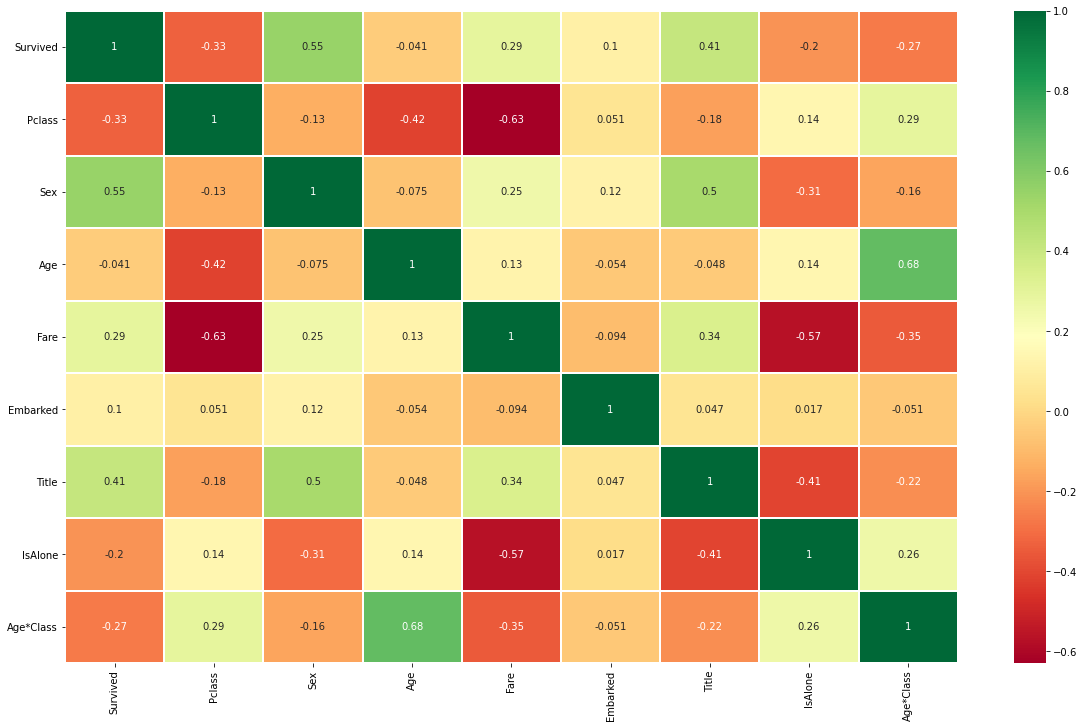

In [57]:
sns.heatmap(df_train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [58]:
df_train_data.shape

(888, 9)

### Get dummies

In [59]:
for cols in df_train_data.columns:
    print(cols)
    print(df_train_data[str(cols)].unique())

Survived
[0 1]
Pclass
[3 1 2]
Sex
[0 1]
Age
[1 2 3 0 4]
Fare
[0 3 1 2]
Embarked
[0 1 2]
Title
[1 3 2 4 5]
IsAlone
[0 1]
Age*Class
[ 3  2  6  0  4  1  8  9 12]


In [60]:
df_train_data = pd.get_dummies(df_train_data, columns = ["Pclass","Age","Fare","Embarked","Title"],
                                     prefix=["CLASS","AGE","FARE_TYPE","EM_TYPE","TITLE"])

In [61]:
df_test_data  = pd.get_dummies(df_test_data, columns = ["Pclass","Age","Fare","Embarked","Title"],
                                     prefix=["CLASS","AGE","FARE_TYPE","EM_TYPE","TITLE"])

In [62]:
df_test_data.columns

Index(['PassengerId', 'Sex', 'IsAlone', 'Age*Class', 'CLASS_1', 'CLASS_2',
       'CLASS_3', 'AGE_0', 'AGE_1', 'AGE_2', 'AGE_3', 'AGE_4', 'FARE_TYPE_0',
       'FARE_TYPE_1', 'FARE_TYPE_2', 'FARE_TYPE_3', 'EM_TYPE_0', 'EM_TYPE_1',
       'EM_TYPE_2', 'TITLE_1', 'TITLE_2', 'TITLE_3', 'TITLE_4', 'TITLE_5'],
      dtype='object')

In [63]:
df_test_data.shape

(418, 24)

# Modeling

Logistic Regression

KNN or k-Nearest Neighbors

Support Vector Machines

Naive Bayes classifier

Decision Tree

Random Forrest

Perceptron

Artificial neural network

RVM or Relevance Vector Machine

In [64]:
X_train = df_train_data.drop("Survived", axis=1)
Y_train = df_train_data["Survived"]
X_test  = df_test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((888, 23), (888,), (418, 23))

In [65]:
df1_cols = df_train_data.columns#X_train.columns
df2_cols = df_test_data.columns#X_test.columns

common_cols = df1_cols.intersection(df2_cols)
uncommon_cols = df1_cols.difference(df2_cols)

uncommon_cols   # If it is blank then we are OK. Because we are sure that they have the same columns.

# We see that the df_train_data has one more column called "Survived"

Index(['Survived'], dtype='object')

In [66]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.76

In [67]:
coeff_df = pd.DataFrame(df_train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,Sex,1.539701
21,TITLE_4,1.268348
3,CLASS_1,1.057177
20,TITLE_3,0.784041
1,IsAlone,0.367236
12,FARE_TYPE_1,0.257034
7,AGE_1,0.249236
16,EM_TYPE_1,0.246303
17,EM_TYPE_2,0.088230
8,AGE_2,0.087337


In [68]:
# Support Vector Machines

svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

# gamma needs to be set to 'auto', instead of setting to the default 'scale'

81.42

In [69]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.35

In [70]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.7

In [71]:
# Perceptron

#perceptron = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=None, tol=None, shuffle=True, 
#                        verbose=0, eta0=1.0, n_jobs=1, random_state=0, class_weight=None, warm_start=False)
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron


# The original notebook in the question used different values for max_iter and tol, which I could not replicate
# Also another argument, n_iter has been that was found in v 0.19 has been removed now in v 0.24.
# So, that's why the result is slightly changed

73.2

In [72]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


82.32

In [141]:
# Stochastic Gradient Descent

sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd
# Changes with each run
# Highest I got was 83.0

83.0

In [74]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.82

In [75]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.82

## Model Evaluation

In [142]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.82
8,Decision Tree,86.82
1,KNN,84.35
6,Stochastic Gradient Decent,83.00
7,Linear SVC,82.32
2,Logistic Regression,81.76
0,Support Vector Machines,81.42
4,Naive Bayes,77.70
5,Perceptron,73.20


In [77]:
submission = pd.DataFrame({
        "PassengerId": df_test_data["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)